____
__Universidad Tecnológica Nacional, Buenos Aires__<br/>
__Ingeniería Industrial__<br/>
__Cátedra de Ciencia de Datos - Curso I5521 - Turno sabado mañana__<br/>
__Elaborado por: Santiago Chas__<br/>
__Editado por: Nicolas Aguirre__
____

# Google Colaboratory

In [1]:
# Verificamos si estamos en Colab
var_google_colab = 'google.colab' in str(get_ipython())
print(var_google_colab)
if var_google_colab:
  #Montamos nuestro G.Drive
  from google.colab import drive
  drive.mount('/content/gdrive',force_remount=True)
  # Direccion root donde está la jupyter-notebook
  root_path = "/content/gdrive/My Drive/Colab Notebooks/ClusterAI/clusterai_2023/clase04/"
  # Direccion donde guardaremos las imagenes
  plot_path = root_path
else:
  # Si, no estamos en google colab, es que estamos corriendo la 
  # en local.
  root_path = "./"
  plot_path = root_path  

False


# Titanic Dataset 

Link: https://www.kaggle.com/c/titanic

## Descripción
|Variable |	Definition |	Key |
| --- | --- | --- |
|survival|	Survival|	0 = No, 1 = Yes|
|pclass|	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|	Sex	| |
|Age|	Age in years| |	
|sibsp|	# of siblings / spouses aboard the Titanic| |	
|parch|	# of parents / children aboard the Titanic| |	
|ticket|	Ticket number | |	
|fare|	Passenger fare |	|
|cabin|	Cabin number	| |
|embarked|	Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton

**Objetivo: Clasificar las tres especies de flores segun los datos**

In [2]:
# Importamos algunas de las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Cargamos el dataset
titanic_df = pd.read_csv(root_path+"titanic_train.csv")
# Observamos una parte de los datos
titanic_df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#Eliminamos columnas que no nos interesan
titanic_df = titanic_df.drop(['PassengerId',"Name", "Ticket","Cabin"],axis=1)
titanic_df.tail(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,male,27.0,0,0,13.00,S
887,1,1,female,19.0,0,0,30.00,S
888,0,3,female,NaN,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


In [7]:
total = titanic_df.isnull().sum().sort_values(ascending=False)
percent = (titanic_df.isnull().sum()/titanic_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Age,177,0.198653
Embarked,2,0.002245
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000


In [8]:
list_a = ['S','Q','C']
titanic_df.loc[~titanic_df['Embarked'].isin(list_a),:]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [9]:
# Lleno vacíos de age con edad promedio
#titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
# Lleno Embarked vacíos con "S"
titanic_df['Embarked'].fillna('S', inplace = True)
# chequeamos que todo esta con los NaN
total = titanic_df.isnull().sum().sort_values(ascending=False)
percent = (titanic_df.isnull().sum()/titanic_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

C:\Users\schas\AppData\Local\Temp\ipykernel_5128\3909793472.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Embarked'].fillna('S', inplace = True)


,Total,Percent
Age,177,0.198653
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


-------------------------------------
# EDA

**Tarea**:

* Imprimir la matriz de correlación

* Histograma y Boxplot por Edad segun "Supervivencia"

* Boxplot para ver Edad en función de la clase (Pclass).


-----------------------------------


# Machine Learning Workflow

In [10]:
# Prepocessing & Utils.
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
#Metricas
from sklearn.metrics import accuracy_score,roc_curve, auc,confusion_matrix
# Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## Dataset

In [11]:
# Definimos las variables de entrenamiento y objetivo.
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']
target = ['Survived']
# Generamos X e Y
X = titanic_df.loc[:,features]
Y = titanic_df.loc[:,target]

# Spliteamos Train y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Pipeline y ColumnTransformer


Vamos a continuar con la implementacion del workflow ede trabajo de ML incorporando dos herramientas.

* [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline)


Pipeline aplica secuencialmente una lista de transformaciones y un estimador final. 

Los pasos (*steps*) intermedios de la cadena deben ser **transformadores**, es decir, deben implementar los métodos `.fit()` y `transform`. 

* [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)

ColumnTransformer aplica transformadores a las columnas de un array o DataFrame de pandas.

Este estimador permite transformar diferentes columnas o subconjuntos de columnas de la entrada por separado y las características generadas por cada transformador se concatenarán para formar un único espacio de características. 

Esto es útil para datos heterogéneos o columnares, para combinar varios mecanismos de extracción de características o transformaciones en un solo transformador.

In [12]:
# Diferenciemos los tipos de variables (numericas, categoricas)
varaibles_num_1 = ["Age", "Fare"]
varaibles_num_2 = ["SibSp","Parch"]
variables_cat = ["Embarked", "Sex", "Pclass"]

[SimpleImputer Doc](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [13]:
# Definamos las transformaciones para cada tipo de variable:
transformacion_num_1 = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

transformacion_num_2 = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", MinMaxScaler())]
)

transformacion_cat = OneHotEncoder(handle_unknown="error")

In [14]:
# Juntemos todo:
preprocesamiento = ColumnTransformer(
    # (nombre,transformacion, columnas )
    transformers=[ 
        ("num1", transformacion_num_1, varaibles_num_1),
        ("num2", transformacion_num_2, varaibles_num_2),
        ("cat", transformacion_cat, variables_cat),
    ]
)

 Veamos que nos devuelve hasta aca el preprocesamiento ...

In [15]:
pd.DataFrame(preprocesamiento.fit_transform(X_train), columns=preprocesamiento.get_feature_names_out())

,num1__Age,num1__Fare,num2__SibSp,num2__Parch,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Sex_female,cat__Sex_male,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3
0,-0.045676,-0.331679,0.000,0.333333,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.107186,-0.426405,0.000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.107186,0.102620,0.125,0.166667,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.733559,-0.555896,0.000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.657127,-0.491276,0.000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.718637,1.023857,0.125,0.166667,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
708,-0.809990,-0.479216,0.125,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
709,-0.045676,-0.481629,0.000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
710,0.489343,-0.288681,0.125,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


Bien, ya tenemos el preprocesamiento consolidado ...

Utilicemos nuevamente **`Pipeline`** para agregarle un estimador ... por ejemplo ... **`LogisticRegression`**.

In [16]:
pipeline = Pipeline(
    steps=[("preprocesamiento", preprocesamiento), ("estimador", LogisticRegression())]
)

Workflow hasta el momento:

In [17]:
from sklearn import set_config
set_config(display="diagram")
pipeline

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('num2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['SibSp', 'Parch']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Embarked', 'Sex',
                                                   'Pclass'])])),
                ('estimador', LogisticRegression())])

# PREGUNTAS ?

## Modelos y sus Hyperparametros

Como sabemos podemos querer comparar muchos modelos ...

Por ejemplo, dado un modelo de SVC hariamos ....

```python
#Modelo
svc = SVC()

#Pipeline
pipeline = Pipeline(
    steps=[("preprocesamiento", preprocesamiento), ("estimador", svc)]
    )

# Hyperparametros
parameters = {'estimador__kernel':['rbf'],
              'estimador__C':[1, 10, 100],
              'estimador__gamma':[0.001, 0.1,1, 10]}
              
# GridhSearchCV
clf = GridSearchCV(pipeline, # pipeline
                   param_grid = parameters, # Hyperparametros
                   refit = True, # refit nos devuelve el modelo con los mejores parametros encontrados 
                   cv = 5, # cv indica la cantidad de folds
                   verbose=1)
#Fit
clf.fit(X_train, Y_train.values.ravel())
```

Y para un modelo distinto, tendriamso que definir un nuevo modelo, pasarselo a Pipiline ...etc, etc, etc ...

![blablabla](https://i.giphy.com/media/bTvrXKt7qoALMMklz4/giphy.webp)


Pero lo que queremos es poder compactar **todo**:

* `Pipeline`

* `ColumnTransformer`

* `Models`

* `GridSearchCV`

In [18]:
# Ya tenemos CASI todo ... solo nos falta definir los modelos y sus hyperparametros

# ATENCION: "__" (son dos "_" seguidos) se usa como indicador de features del estimador. 

parametros = [
    {
        "estimador": (LogisticRegression(),),
          "estimador__C": (0.001,1,10)
    }, 
    {
        "estimador": (RandomForestClassifier(),),
        "estimador__n_estimators": [50, 100], 
        "estimador__max_features": [3, 8], 
        "estimador__max_depth": [5, 20, 50], 
        "estimador__min_samples_leaf":[ 8, 10]
    },
    {
        "estimador": (SVC(probability=True),),
          "estimador__kernel":['rbf'], 
          "estimador__C":(1, 10, 100), 
          "estimador__gamma":(0.001, 0.01, 0.1,1, 10)          
    }
]

In [19]:
set_config(display="text")

In [20]:
# Creamos el GSCV: 
grid_search = GridSearchCV(pipeline, parametros,
                  refit = True, # refit nos devuelve el modelo con los mejores parametros encontrados 
                   cv = 5, # cv indica la cantidad de folds
                   verbose=1,
                   n_jobs=8)

## Fitting !

In [21]:
grid_search.fit(X_train, Y_train.values.ravel())

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocesamiento',
                                        ColumnTransformer(transformers=[('num1',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('num2',
                                                                         Pipeline(steps=[('imputer',
                                                        

In [22]:
# Toda la informacion del entrenamiento esta en cv_results_
scores = grid_search.cv_results_
# Veamosla ...
scores_df = pd.DataFrame.from_dict(scores)
scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimador,param_estimador__C,param_estimador__max_depth,param_estimador__max_features,param_estimador__min_samples_leaf,param_estimador__n_estimators,...,param_estimador__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021212,0.002047,0.0074,0.001020,LogisticRegression(),0.001,NaN,NaN,NaN,NaN,...,NaN,"{'estimador': LogisticRegression(), 'estimador...",0.622378,0.615385,0.633803,0.619718,0.612676,0.620792,0.007322,42
1,0.027001,0.002279,0.0084,0.001019,LogisticRegression(),1,NaN,NaN,NaN,NaN,...,NaN,"{'estimador': LogisticRegression(), 'estimador...",0.755245,0.825175,0.767606,0.795775,0.830986,0.794957,0.030123,31
2,0.034397,0.014523,0.0066,0.000490,LogisticRegression(),10,NaN,NaN,NaN,NaN,...,NaN,"{'estimador': LogisticRegression(), 'estimador...",0.762238,0.818182,0.746479,0.788732,0.838028,0.790732,0.033955,32
3,0.125601,0.010131,0.0120,0.001096,"RandomForestClassifier(max_depth=50, max_featu...",NaN,5,3,8,50,...,NaN,{'estimador': RandomForestClassifier(max_depth...,0.776224,0.867133,0.795775,0.788732,0.823944,0.810361,0.032414,10
4,0.233400,0.006974,0.0188,0.001939,"RandomForestClassifier(max_depth=50, max_featu...",NaN,5,3,8,100,...,NaN,{'estimador': RandomForestClassifier(max_depth...,0.776224,0.860140,0.767606,0.802817,0.845070,0.810371,0.036696,9


In [23]:
print("The best parameters are %s with a score of %0.2f" % (grid_search.best_params_, grid_search.best_score_))

The best parameters are {'estimador': RandomForestClassifier(max_depth=50, max_features=8, min_samples_leaf=8,
                       n_estimators=50), 'estimador__max_depth': 50, 'estimador__max_features': 8, 'estimador__min_samples_leaf': 8, 'estimador__n_estimators': 50} with a score of 0.82


## Predict

In [24]:
pd.DataFrame(preprocesamiento.transform(X_test), columns=preprocesamiento.get_feature_names_out())

,num1__Age,num1__Fare,num2__SibSp,num2__Parch,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Sex_female,cat__Sex_male,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3
0,-0.045676,-0.347398,0.000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.045676,-0.485288,0.000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,-1.727166,-0.054650,0.500,0.166667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.045676,2.288576,0.125,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.045676,-0.331679,0.000,0.333333,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
174,-1.268578,-0.491691,0.000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
175,-0.045676,-0.475308,0.000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
176,0.107186,1.624988,0.125,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
177,-0.504265,-0.479216,0.000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [25]:
# Prediction sobre las muestras de test
Y_pred = grid_search.predict(X_test)
print(Y_pred)

[0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


## Results

In [26]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(Y_test, Y_pred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.8324022346368715


In [27]:
# Compute and plot AUC
Y_proba = grid_search.predict_proba(X_test)
fpr1, tpr1, thresholds = roc_curve(Y_test.astype('int'), Y_proba[:,1], drop_intermediate = False)
auc_value = auc(fpr1, tpr1)
print("El AUC es = " + str(auc_value))

El AUC es = 0.8940052700922266


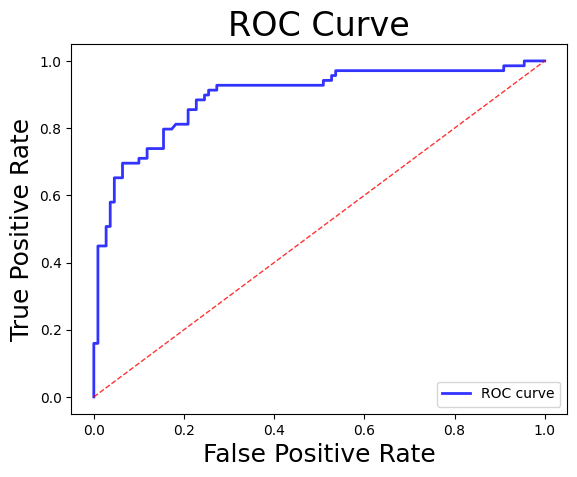

In [28]:
plt.plot(fpr1, tpr1, lw=2, alpha=0.8 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r', alpha=.8)
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC Curve',fontsize=24)
plt.show()

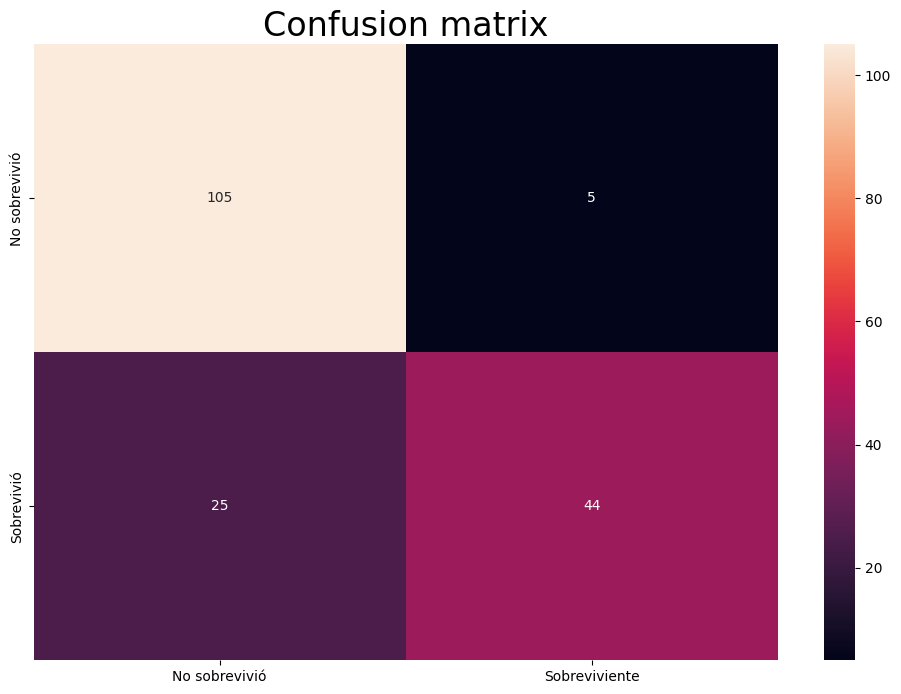

In [29]:
# Compute Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cm, index = ['No sobrevivió', 'Sobrevivió'], columns = ['No sobrevivió', "Sobreviviente"])
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.title('Confusion matrix',fontsize=24)
plt.show()

# PREGUNTAS?

![meme](https://pythonprogramming.net/static/images/svm/machineLearning.png)